In [43]:
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import pandas as pd

In [39]:
with open('./train_image.pkl', 'rb') as f:
    train_image = pickle.load(f)
    
with open('./train_label.pkl', 'rb') as f:
    train_label = pickle.load(f)

with open('./test_image.pkl', 'rb') as f:
    test_image = pickle.load(f)


In [40]:
train_image = np.array(train_image)
train_image = train_image.reshape((-1,28,28))
train_image.shape
test_image = np.array(test_image)
test_image = test_image.reshape((-1,28,28,1))

In [31]:
train_label = np.array(train_label)
train_label.shape
train_label

array([0, 0, 0, ..., 6, 6, 6])

/home/ramendra/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


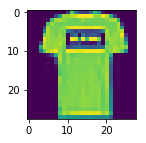

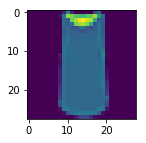

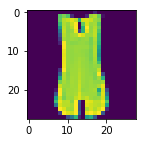

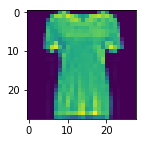

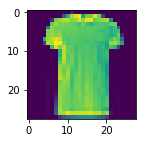

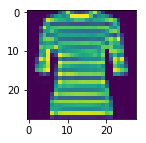

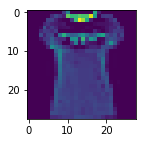

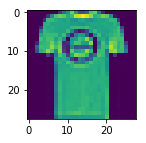

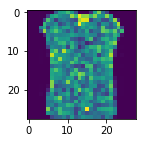

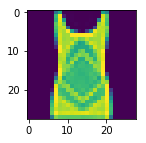

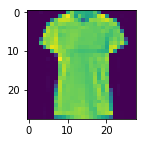

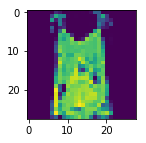

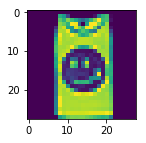

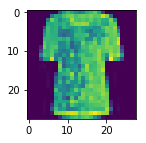

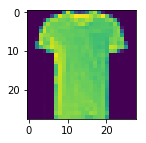

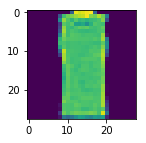

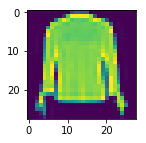

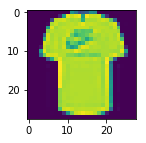

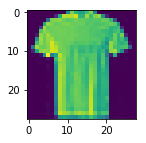

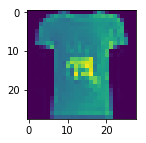

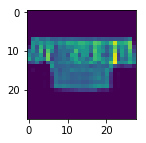

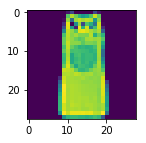

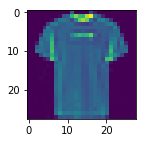

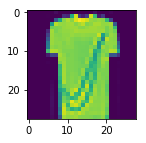

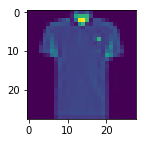

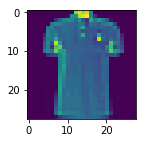

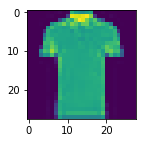

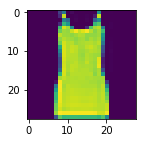

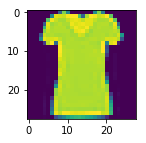

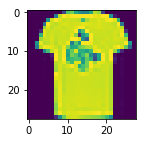

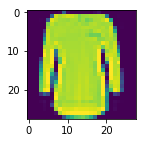

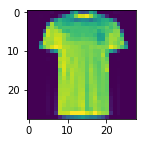

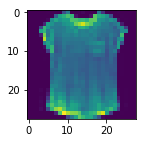

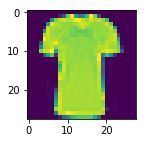

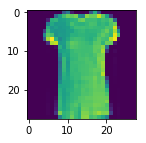

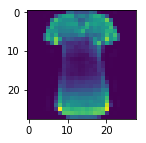

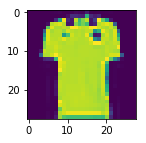

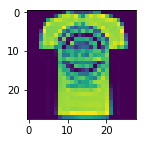

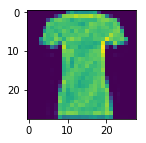

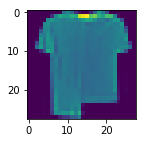

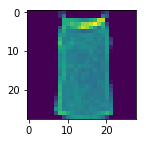

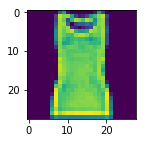

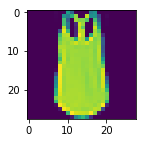

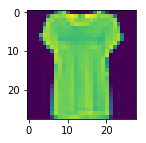

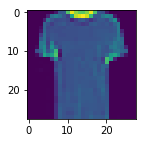

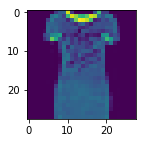

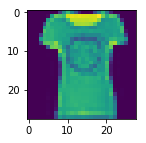

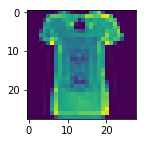

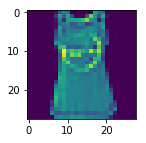

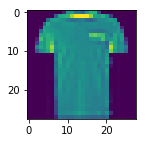

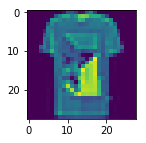

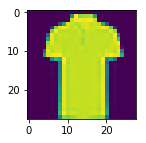

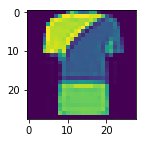

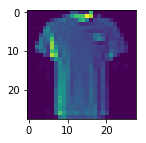

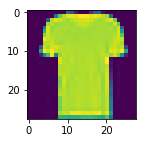

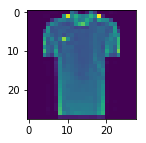

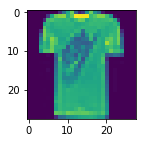

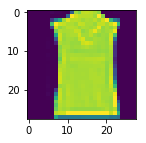

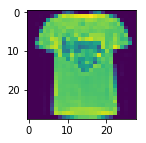

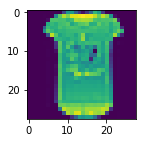

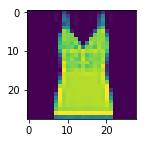

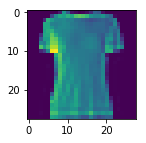

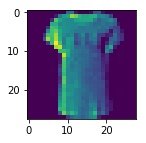

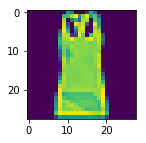

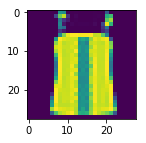

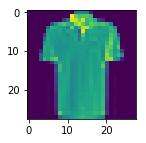

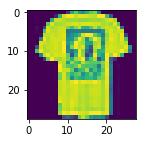

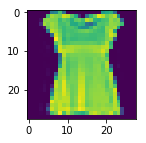

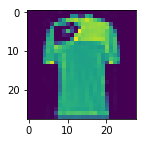

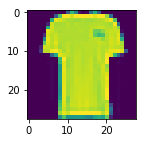

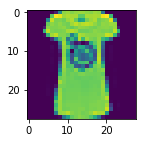

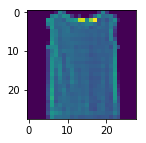

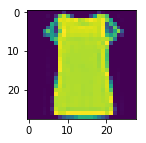

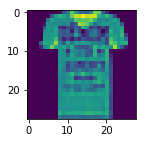

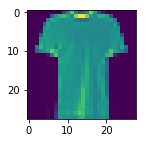

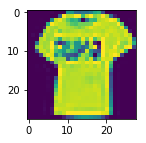

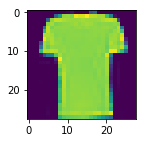

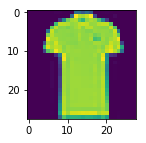

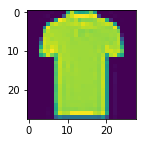

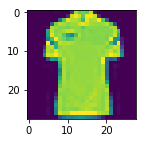

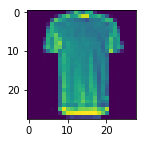

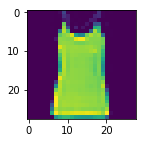

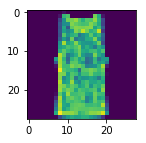

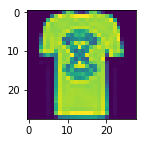

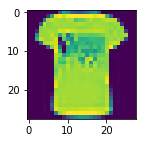

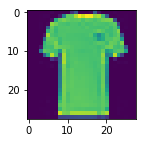

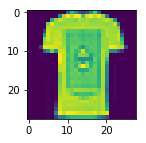

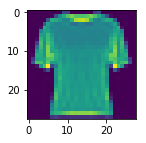

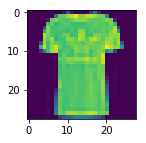

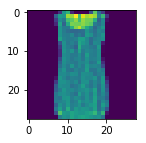

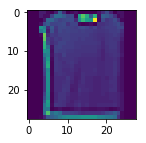

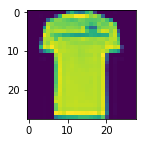

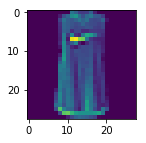

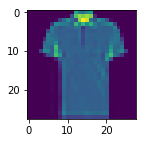

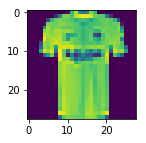

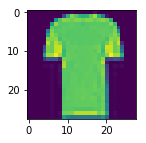

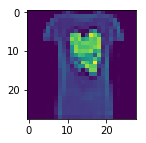

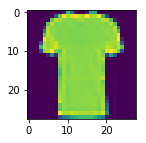

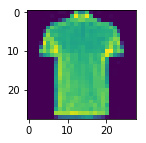

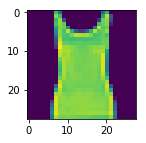

In [32]:
for ix in range(100):
    plt.figure(ix, figsize=(9,2))
    plt.imshow(train_image[ix])

In [33]:
x_train = train_image.reshape((-1,28,28,1))
y_train = train_label.reshape((-1,1))
im_shape = (28,28,1)
batch_size = 512
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]


In [34]:
for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [36]:
history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 3s 444us/step - loss: 0.1524 - acc: 0.9475 - val_loss: 0.6102 - val_acc: 0.8444
Epoch 2/50
6400/6400 [==============================] - 2s 317us/step - loss: 0.1113 - acc: 0.9637 - val_loss: 0.6292 - val_acc: 0.8562
Epoch 3/50
6400/6400 [==============================] - 2s 315us/step - loss: 0.0988 - acc: 0.9683 - val_loss: 0.6457 - val_acc: 0.8475
Epoch 4/50
6400/6400 [==============================] - 2s 326us/step - loss: 0.0936 - acc: 0.9688 - val_loss: 0.6475 - val_acc: 0.8488
Epoch 5/50
6400/6400 [==============================] - 2s 319us/step - loss: 0.0882 - acc: 0.9691 - val_loss: 0.6897 - val_acc: 0.8450
Epoch 6/50
6400/6400 [==============================] - 2s 312us/step - loss: 0.0920 - acc: 0.9698 - val_loss: 0.7305 - val_acc: 0.8538
Epoch 7/50
6400/6400 [==============================] - 2s 328us/step - loss: 0.0828 - acc: 0.9722 - val_loss: 0.6959 - val_acc: 0.8494


KeyboardInterrupt: 

In [45]:

out = pd.DataFrame(cnn_model.predict_classes(test_image))
out.to_csv('Output.csv')